In [10]:
# Setup
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np

sys.path.insert(0, '..')
plt.rcParams['figure.figsize'] = [10, 8]

from graph import Graph
from walkers import RandomWalker
from simulator import Simulator

### The following code calculates the average slope of log(1-Sn) vs number of steps, where Sn is the visited proportions, based on 100 simulations. n = 1000, d = 10, k = 10 

In [11]:
# Set parameters of n, d, p, k = 10
n = 1000
expected_deg = 10
p = expected_deg/n
k = 10

In [14]:
# Do a log transformation on 1- S_n and calculate the average slope of the linear fit on 100 simulations
nsim = 100
slope_values = np.empty(100, dtype = float)

for i in range(0, nsim):
    S_n = Simulator.simulate_rw_on_rg_visited_prop(n, p, k, d=expected_deg)
    S_n = S_n[S_n < 1]
    S_n_log = np.log(1-S_n)
    x_to_fit = np.arange(1,len(S_n_log) + 1, 1)
    p = np.polyfit(x_to_fit, S_n_log, 1)
    slope_values[i] = p[1]
print(slope_values)

[-1.52699039 -2.14368882 -1.45891538 -2.49115039 -1.43534128 -1.40784165
 -2.94668321 -1.14206619 -1.92236164 -1.73890859 -1.43928892 -2.1101461
 -1.63332006 -1.69414069 -1.34355176 -3.38348185 -2.09878517 -2.79721876
 -2.48224067 -1.09890203 -1.84378058 -2.17208254 -2.41567569 -0.72404139
 -2.97787717 -1.94447855 -0.94990043 -2.20823582 -2.39813575 -1.55287704
 -2.27043429 -2.51173516 -1.40785733 -1.62708111 -1.74030445 -2.39321664
 -1.6305265  -2.10187823 -2.01260723 -1.82453022 -2.73595931 -1.48904208
 -2.44683646 -0.87369656 -3.30250889 -2.64545863 -1.68230898 -1.03157025
 -1.25003636 -2.04498758 -2.57560786 -1.59345543 -2.49874899 -2.63159211
 -0.95750406 -3.07937685 -2.32714674 -1.61847925 -1.31043308 -2.3147696
 -1.77624498 -1.92099638 -1.21347902 -2.94803462 -2.55445309 -2.42175941
 -1.73301718 -3.48069588 -1.70738063 -3.63210869 -0.97641716 -0.86330497
 -1.66708269 -3.82494804 -1.44358045 -3.46362715 -1.79154973 -2.31319048
 -2.50615819 -0.8650271  -1.80768589 -2.7616546  -1.3

(array([ 2.,  5.,  5.,  7., 17., 11., 18., 18.,  8.,  9.]),
 array([-3.82494804, -3.51485738, -3.20476671, -2.89467605, -2.58458538,
        -2.27449471, -1.96440405, -1.65431338, -1.34422272, -1.03413205,
        -0.72404139]),
 <a list of 10 Patch objects>)

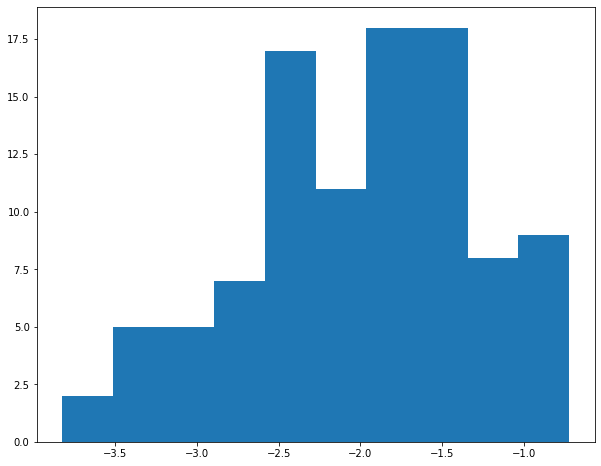

In [21]:
plt.hist(slope_values)

In [22]:
# Get the average Slope value for 100 runs
slope_values.mean()

-2.0076435007333098